In [1]:
!pip install pyDecision

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from tabulate import tabulate
from pyDecision.algorithm import borda_method, copeland_method
from pyDecision.compare.compare import compare_ranks_crisp, plot_rank_freq, corr_viz

In [26]:
# ChatGPT integration to understand decision
import textwrap
from pyDecision.util.LLM import ask_chatgpt_rank, ask_chatgpt_corr

In [28]:
# Dataset
# Assuming your data is in a CSV file named 'data.csv'
df = pd.read_csv('C:/Users/pranjali.bhogle/Downloads/block_insights_2104_2024-10-14_03-46-32.csv')
df

,Keyword,Ctr 1,Ctr 2,Ctr 3,Ctr 4,Epc,Earnings
0,Accident Compensation Lawyers,1.0000,0.0327,0.0286,0.0286,0.9406,6.5845
1,crash lawyer near me,1.0000,0.0921,0.0702,0.0702,0.5910,9.4563
2,auto crash lawyer near me,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,Truck Crash Lawyer Near Me,1.0000,0.0286,0.0286,0.0286,0.0000,0.0000
4,crash attorney near me,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,semi crash lawyer,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,the best accident lawyer near me,0.9937,0.0063,0.0063,0.0063,0.0000,0.0000
7,injuries lawyer nearby,0.9722,0.0143,0.0143,0.0139,0.6730,1.3461
8,injury and accident lawyer,0.8774,0.0147,0.0147,0.0129,0.7067,1.4134
9,car accident compensation lawyers,0.4444,0.0250,0.0000,0.0000,0.0000,0.0000


In [29]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize all columns except 'keyword'
data_normalized = df.copy()
data_normalized[['Ctr 1', 'Ctr 2', 'Ctr 3', 'Ctr 4', 'Epc', 'Earnings']] = scaler.fit_transform(
    df[['Ctr 1', 'Ctr 2', 'Ctr 3', 'Ctr 4', 'Epc', 'Earnings']]
)

# Display normalized data
print(data_normalized)

                             Keyword     Ctr 1     Ctr 2     Ctr 3     Ctr 4  \
0      Accident Compensation Lawyers  1.000000  0.355049  0.407407  0.407407   
1               crash lawyer near me  1.000000  1.000000  1.000000  1.000000   
2          auto crash lawyer near me  1.000000  0.000000  0.000000  0.000000   
3         Truck Crash Lawyer Near Me  1.000000  0.310532  0.407407  0.407407   
4             crash attorney near me  1.000000  0.000000  0.000000  0.000000   
5                  semi crash lawyer  1.000000  0.000000  0.000000  0.000000   
6   the best accident lawyer near me  0.988661  0.068404  0.089744  0.089744   
7             injuries lawyer nearby  0.949964  0.155266  0.203704  0.198006   
8         injury and accident lawyer  0.779338  0.159609  0.209402  0.183761   
9  car accident compensation lawyers  0.000000  0.271444  0.000000  0.000000   

        Epc  Earnings  
0  1.000000  0.696308  
1  0.628322  1.000000  
2  0.000000  0.000000  
3  0.000000  0.000000  

In [30]:
# Prepare dataset for MCDA comparison
dataset = data_normalized[['Ctr 1', 'Ctr 2', 'Ctr 3', 'Ctr 4', 'Epc', 'Earnings']].values

# Weights and criterion types
weights = [0.30, 0.05, 0.15, 0.10, 0.20, 0.20]
criterion_type = ['max', 'max', 'max', 'max', 'max', 'max']

# Compare using MCDA methods
methods_list = ['aras', 'cocoso', 'codas', 'copras', 'cradis', 'edas', 'gra', 'mabac', 'macbeth', 'mairca', 'marcos',
                'maut', 'moora', 'moosra', 'multimoora', 'ocra', 'oreste', 'piv', 'promethee_ii', 'promethee_iv', 
                'ec_promethee', 'psi','rov', 'saw', 'todim', 'topsis',
                'vikor', 'wsm', 'wpm', 'waspas']#,'spotis'] # New Methods: 'wisp', 'simple wisp', 'mara', 'rafsi'

In [31]:
# OPTIONAL - Load Parameters from the Methods List
Q                    = [  5,   10,  1.7,  0.02, 0.01, 0.01, 0.01]            # Only Relevant if PROMETHEE II, PROMETHEE IV or EC PROMETHEE is selected.
S                    = [  7,   15,  1.9,  0.03, 0.02, 0.02, 0.02]            # Only Relevant if PROMETHEE II, PROMETHEE IV or EC PROMETHEE is selected.
P                    = [  9,   20,  2.5,  0.04, 0.03, 0.03, 0.03]            # Only Relevant if PROMETHEE II, PROMETHEE IV or EC PROMETHEE is selected.
F                    = ['t1', 't1', 't1', 't1', 't1', 't1', 't1']            # Only Relevant if PROMETHEE II, PROMETHEE IV or EC PROMETHEE is selected.
custom_sets          = [ [0.5,  0.5,  0.5,   0.5,  0.5,  0.5, 0.5] ]         # Only Relevant if EC PROMETHEE is selected.
iterations           = 10000                                                 # Only Relevant if EC PROMETHEE is selected.
utility_functions    = ['exp', 'exp', 'exp', 'step', 'step', 'step', 'exp']  # Only Relevant if MAUT   method is selected.
step_size            = 1                                                     # Only Relevant if MAUT   method is selected. Default Value = 1
L                    = 0.5                                                   # Only Relevant if CoCoSo method is selected. Default Value = 0.5
lmbd                 = 0.02                                                  # Only Relevant if CODAS  method is selected. Default Value = 0.02
epsilon              = 0.5                                                   # Only Relevant if GRA    method is selected. Default Value = 0.5
alpha                = 0.4                                                   # Only Relevant if ORESTE method is selected. Default Value = 0.4
teta                 = 1                                                     # Only Relevant if TODIM  method is selected. Default Value = 1
strategy_coefficient = 1                                                     # Only Relevant if VIKOR  method is selected. Default Value = 0.5
s_min                = [70, 90, 50, 2.7,9.0, 0.01, 0.05]         # Only Relevant if SPOTIS method is selected. Default Value = 0.5
s_max                = [780, 1200, 220, 9.7, 24.0, 0.41, 0.25]              # Only Relevant if SPOTIS method is selected. Default Value = 0.5
# ideal                = []                                                    # Only Relevant if RAFSI  method is selected. Default Value = []
# anti_ideal           = []                                                    # Only Relevant if RAFSI  method is selected. Default Value = []
# n_i                  = 1                                                     # Only Relevant if RAFSI  method is selected. Default Value = 1
# n_k                  = 6                                                     # Only Relevant if RAFSI  method is selected. Default Value = 6

In [32]:
values, ranks = compare_ranks_crisp(dataset, weights, criterion_type,
                                    utility_functions    = utility_functions,
                                    methods_list         = methods_list,
                                    L                    = L,
                                    lmbd                 = lmbd,
                                    epsilon              = epsilon,
                                    step_size            = step_size,
                                    teta                 = teta,
                                    strategy_coefficient = strategy_coefficient,
                                    Q                    = Q,
                                    S                    = S,
                                    P                    = P,
                                    F                    = F,
                                    custom_sets          = custom_sets,
                                    iterations           = iterations,
                                    alpha                = alpha,
                                    s_min                = s_min,
                                    s_max                = s_max,
#                                     ideal                = ideal,
#                                     anti_ideal           = anti_ideal,
#                                     n_i                  = n_i,
#                                     n_k                  = n_k
                                   )

ARAS: Done!
CoCoSo: Done!
CODAS: Done!
COPRAS: Done!
CRADIS: Done!
EDAS: Done!
GRA: Done!
MABAC: Done!
MACBETH: Done!
MAIRCA: Done!
MARCOS: Done!
MAUT: Done!
MOORA: Done!
MOOSRA: Done!
MULTIMOORA: Done!
OCRA: Done!
ORESTE: Done!
PIV: Done!
PROMETHEE II: Done!
PROMETHEE IV: Done!


C:\Users\pranjali.bhogle\AppData\Roaming\Python\Python39\site-packages\pyDecision\algorithm\cradis.py:36: RuntimeWarning: invalid value encountered in divide
  X[:,j] = np.min(X[:,j]) / X[:,j]
C:\Users\pranjali.bhogle\AppData\Roaming\Python\Python39\site-packages\pyDecision\algorithm\marcos.py:60: RuntimeWarning: divide by zero encountered in divide
  k_n   = S / np.sum(worst)
C:\Users\pranjali.bhogle\AppData\Roaming\Python\Python39\site-packages\pyDecision\algorithm\marcos.py:63: RuntimeWarning: invalid value encountered in divide
  f_k_p = k_n / (k_p + k_n)
C:\Users\pranjali.bhogle\AppData\Roaming\Python\Python39\site-packages\pyDecision\algorithm\marcos.py:64: RuntimeWarning: divide by zero encountered in divide
  f_k   = (k_p + k_n) / (1 + ((1 - f_k_p) / f_k_p) + ((1 - f_k_n) / f_k_n))
C:\Users\pranjali.bhogle\AppData\Roaming\Python\Python39\site-packages\pyDecision\algorithm\moosra.py:52: RuntimeWarning: divide by zero encountered in divide
  Y    = s_p/s_m
C:\Users\pranjali.bhogl

EC PROMETHEE: Done!
PSI: Done!
ROV: Done!
SAW: Done!
TODIM: Done!
TOPSIS: Done!
VIKOR: Done!
WSM: Done!
WPM: Done!
WASPAS: Done!


In [33]:
# Print Values
# print("Values:")
# print(tabulate(values, headers='keys', tablefmt='psql'))

# Print Values
print(tabulate(values, headers = 'keys', tablefmt = 'psql'))

# Print Ranks
print(tabulate(ranks, headers = 'keys', tablefmt = 'psql'))


+-----+-----------+-----------+------------+-----------+----------+-----------+-----------+------------+-----------+------------+----------+-----------+-----------+----------+--------------+--------+----------+-----------+----------------+----------------+----------------+-----------+-----------+-----------+-----------+-----------+---------+---------+---------+----------+
|     |      aras |    cocoso |      codas |    copras |   cradis |      edas |       gra |      mabac |   macbeth |     mairca |   marcos |      maut |     moora |   moosra |   multimoora |   ocra |   oreste |       piv |   promethee_ii |   promethee_iv |   ec_promethee |       psi |       rov |       saw |     todim |    topsis |   vikor |     wsm |     wpm |   waspas |
|-----+-----------+-----------+------------+-----------+----------+-----------+-----------+------------+-----------+------------+----------+-----------+-----------+----------+--------------+--------+----------+-----------+----------------+-----------

In [34]:
# Function to handle empty sequence issue for finding modes
def find_column_modes(matrix):
    transposed_matrix = np.transpose(matrix)
    mode_list = []
    for column in transposed_matrix:
        counter = Counter(column)
        if len(counter) == 0:
            mode_list.append([])  # Handle empty columns
        else:
            max_count = max(counter.values(), default=None)  # Use default to avoid empty sequence
            modes = [x for x, count in counter.items() if count == max_count]
            mode_list.append(modes if modes else ['No mode'])
    return mode_list

In [35]:
# Find mode of ranks
rank_modes = find_column_modes(ranks.T.values)
rank_modes

[[2.0], [1.0], [7.0], [5.0], [7.0], [7.0], [6.0], [3.0], [4.0], [10.0]]

In [36]:
# Extract keywords from the DataFrame
keywords = df['Keyword'].tolist()

# Display the modes of ranks using keywords from the DataFrame
print("\nMode of Ranks for each keyword:")
for i, mode in enumerate(rank_modes):
    print(f"{keywords[i]}: {mode if mode else 'No mode'}")



Mode of Ranks for each keyword:
Accident Compensation Lawyers: [2.0]
crash lawyer near me: [1.0]
auto crash lawyer near me: [7.0]
Truck Crash Lawyer Near Me: [5.0]
crash attorney near me: [7.0]
semi crash lawyer: [7.0]
the best accident lawyer near me: [6.0]
injuries lawyer nearby: [3.0]
injury and accident lawyer: [4.0]
car accident compensation lawyers: [10.0]


In [37]:
# Create a dictionary to store the keywords and their corresponding modes
keyword_ranks = {keywords[i]: rank_modes[i] for i in range(len(keywords))}

# Sort the dictionary by rank values
sorted_keyword_ranks = sorted(keyword_ranks.items(), key=lambda x: x[1])

# Display the sorted results
print("\nSorted Mode of Ranks for each keyword:")
for keyword, rank in sorted_keyword_ranks:
    print(f"{keyword}: {rank}")
    
    



Sorted Mode of Ranks for each keyword:
crash lawyer near me: [1.0]
Accident Compensation Lawyers: [2.0]
injuries lawyer nearby: [3.0]
injury and accident lawyer: [4.0]
Truck Crash Lawyer Near Me: [5.0]
the best accident lawyer near me: [6.0]
auto crash lawyer near me: [7.0]
crash attorney near me: [7.0]
semi crash lawyer: [7.0]
car accident compensation lawyers: [10.0]


a1: 82.0
a2: 59.0
a3: 201.0
a4: 155.0
a5: 219.0
a6: 245.0
a7: 188.0
a8: 107.0
a9: 130.0
a10: 264.0


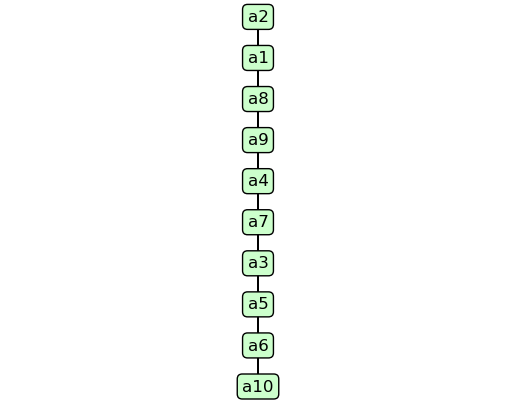


Borda Method Ranking with Keywords:
crash lawyer near me: 59.0
Accident Compensation Lawyers: 82.0
injuries lawyer nearby: 107.0
injury and accident lawyer: 130.0
Truck Crash Lawyer Near Me: 155.0
the best accident lawyer near me: 188.0
auto crash lawyer near me: 201.0
crash attorney near me: 219.0
semi crash lawyer: 245.0
car accident compensation lawyers: 264.0


In [38]:
# Perform Borda Method ranking
rank_borda = borda_method(ranks.values, ['min'] * ranks.shape[1], graph=True, verbose=True)

# Create a DataFrame to associate keywords with their Borda ranks
borda_results = pd.DataFrame({
    'Keyword': df['Keyword'],  # Assuming 'df' contains your original DataFrame with keywords
    'Borda Rank': rank_borda
})

# Sort the results by Borda Rank
borda_results = borda_results.sort_values(by='Borda Rank')

# Display the sorted results
print("\nBorda Method Ranking with Keywords:")
for index, row in borda_results.iterrows():
    print(f"{row['Keyword']}: {row['Borda Rank']}")


a1: 82.0
a2: 59.0
a3: 201.0
a4: 155.0
a5: 219.0
a6: 245.0
a7: 188.0
a8: 107.0
a9: 130.0
a10: 264.0


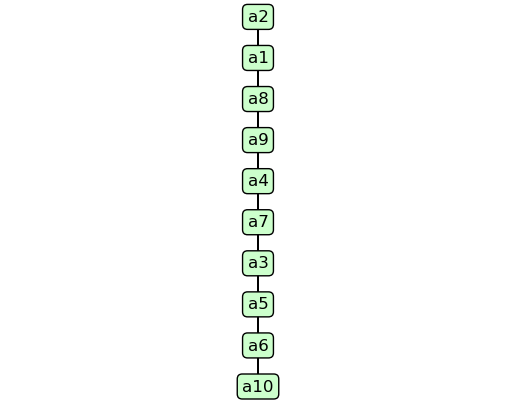


Borda Method Ranking with Keywords:
crash lawyer near me: 1.0 (Score: 59.0)
Accident Compensation Lawyers: 2.0 (Score: 82.0)
injuries lawyer nearby: 3.0 (Score: 107.0)
injury and accident lawyer: 4.0 (Score: 130.0)
Truck Crash Lawyer Near Me: 5.0 (Score: 155.0)
the best accident lawyer near me: 6.0 (Score: 188.0)
auto crash lawyer near me: 7.0 (Score: 201.0)
crash attorney near me: 8.0 (Score: 219.0)
semi crash lawyer: 9.0 (Score: 245.0)
car accident compensation lawyers: 10.0 (Score: 264.0)


In [39]:
# Perform Borda Method ranking
rank_borda = borda_method(ranks.values, ['min'] * ranks.shape[1], graph=True, verbose=True)

# Create a DataFrame to associate keywords with their Borda ranks
borda_results = pd.DataFrame({
    'Keyword': df['Keyword'],  # Assuming 'df' contains your original DataFrame with keywords
    'Borda Score': rank_borda
})

# Assign ranks (lower values should get a higher rank)
borda_results['Borda Rank'] = borda_results['Borda Score'].rank(method='min')

# Sort the results by Borda Rank
borda_results = borda_results.sort_values(by='Borda Rank')

# Display the sorted results
print("\nBorda Method Ranking with Keywords:")
for index, row in borda_results.iterrows():
    print(f"{row['Keyword']}: {row['Borda Rank']} (Score: {row['Borda Score']})")


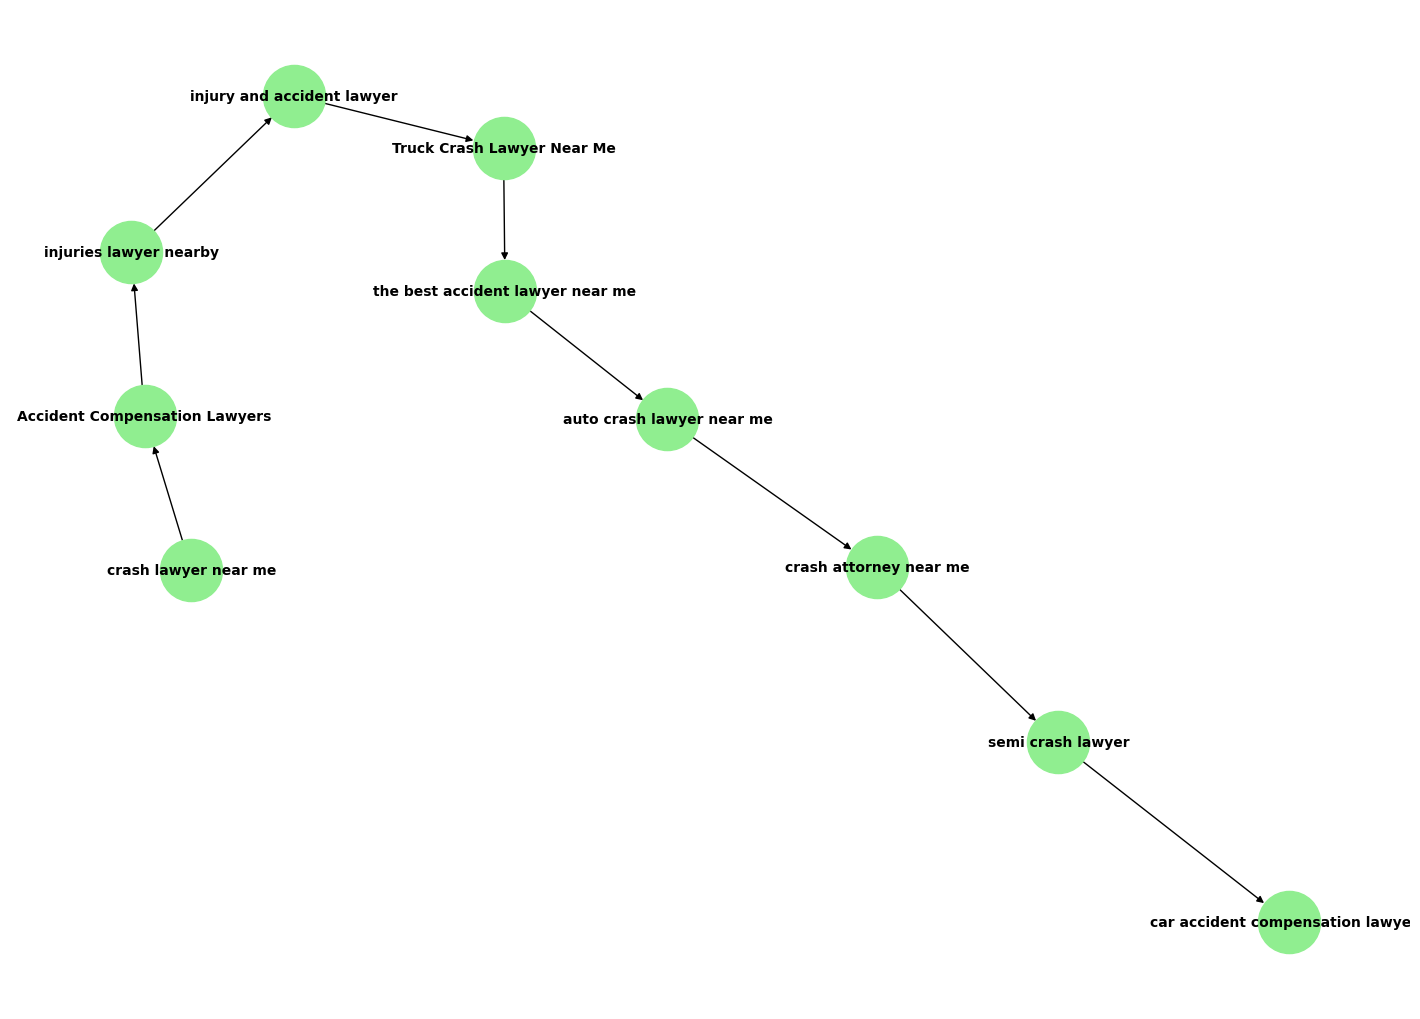

In [40]:
import matplotlib.pyplot as plt
import networkx as nx

# Perform Borda Method ranking
rank_borda = borda_method(ranks.values, ['min'] * ranks.shape[1], graph=False, verbose=False)

# Create a DataFrame to associate keywords with their Borda ranks
borda_results = pd.DataFrame({
    'Keyword': df['Keyword'],  # Assuming 'df' contains your original DataFrame with keywords
    'Borda Rank': rank_borda
})

# Sort the results by Borda Rank
borda_results = borda_results.sort_values(by='Borda Rank')

# Extract the sorted keywords
sorted_keywords = borda_results['Keyword'].tolist()

# Plot graph using sorted keywords instead of a1, a2, ...
plt.figure(figsize=(14, 10))  # Increase the size of the graph
G = nx.DiGraph()  # Directed graph
for i, keyword in enumerate(sorted_keywords):
    G.add_node(keyword)

# Add edges for visualization (example of a connected graph structure)
for i in range(len(sorted_keywords) - 1):
    G.add_edge(sorted_keywords[i], sorted_keywords[i+1])

# Draw graph
pos = nx.spring_layout(G)  # Spring layout for better visualization
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=2000, font_size=10, font_weight='bold')
plt.show()


a1: 157.0
a2: 205.0
a3: -130.0
a4: 14.0
a5: -110.0
a6: -110.0
a7: -40.0
a8: 121.0
a9: 77.0
a10: -184.0


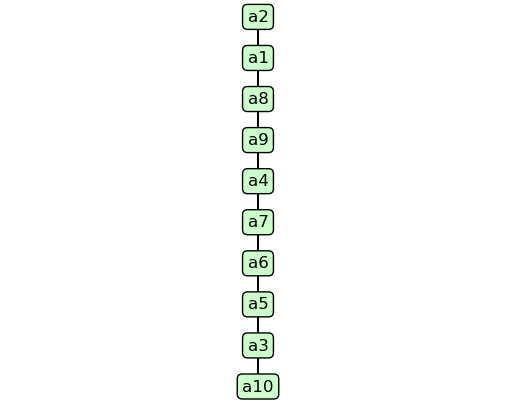


Copeland Method Ranking with Keywords:
crash lawyer near me: 1.0 (Score: 205.0)
Accident Compensation Lawyers: 2.0 (Score: 157.0)
injuries lawyer nearby: 3.0 (Score: 121.0)
injury and accident lawyer: 4.0 (Score: 77.0)
Truck Crash Lawyer Near Me: 5.0 (Score: 14.0)
the best accident lawyer near me: 6.0 (Score: -40.0)
crash attorney near me: 7.0 (Score: -110.0)
semi crash lawyer: 7.0 (Score: -110.0)
auto crash lawyer near me: 9.0 (Score: -130.0)
car accident compensation lawyers: 10.0 (Score: -184.0)


In [41]:
# Perform Copeland Method ranking
rank_copeland = copeland_method(ranks.values, ['min'] * ranks.shape[1], graph=True, verbose=True)

# Create a DataFrame to associate keywords with their Copeland ranks
Copeland_results = pd.DataFrame({
    'Keyword': df['Keyword'],  # Assuming 'df' contains your original DataFrame with keywords
    'Copeland Score': rank_copeland
})

# Assign ranks (higher Copeland scores should get a higher rank)
Copeland_results['Copeland Rank'] = Copeland_results['Copeland Score'].rank(ascending=False, method='min')

# Sort the results by Copeland Rank
Copeland_results = Copeland_results.sort_values(by='Copeland Rank')

# Display the sorted results
print("\nCopeland Method Ranking with Keywords:")
for index, row in Copeland_results.iterrows():
    print(f"{row['Keyword']}: {row['Copeland Rank']} (Score: {row['Copeland Score']})")


a1: 157.0
a2: 205.0
a3: -130.0
a4: 14.0
a5: -110.0
a6: -110.0
a7: -40.0
a8: 121.0
a9: 77.0
a10: -184.0


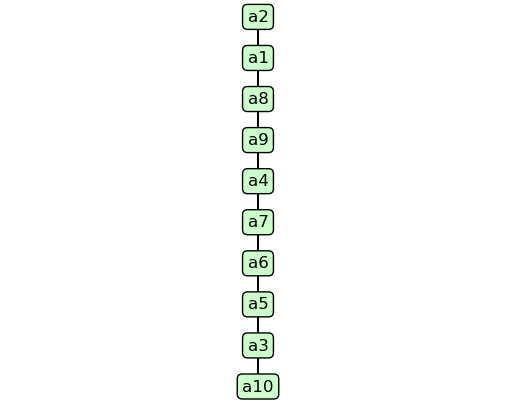

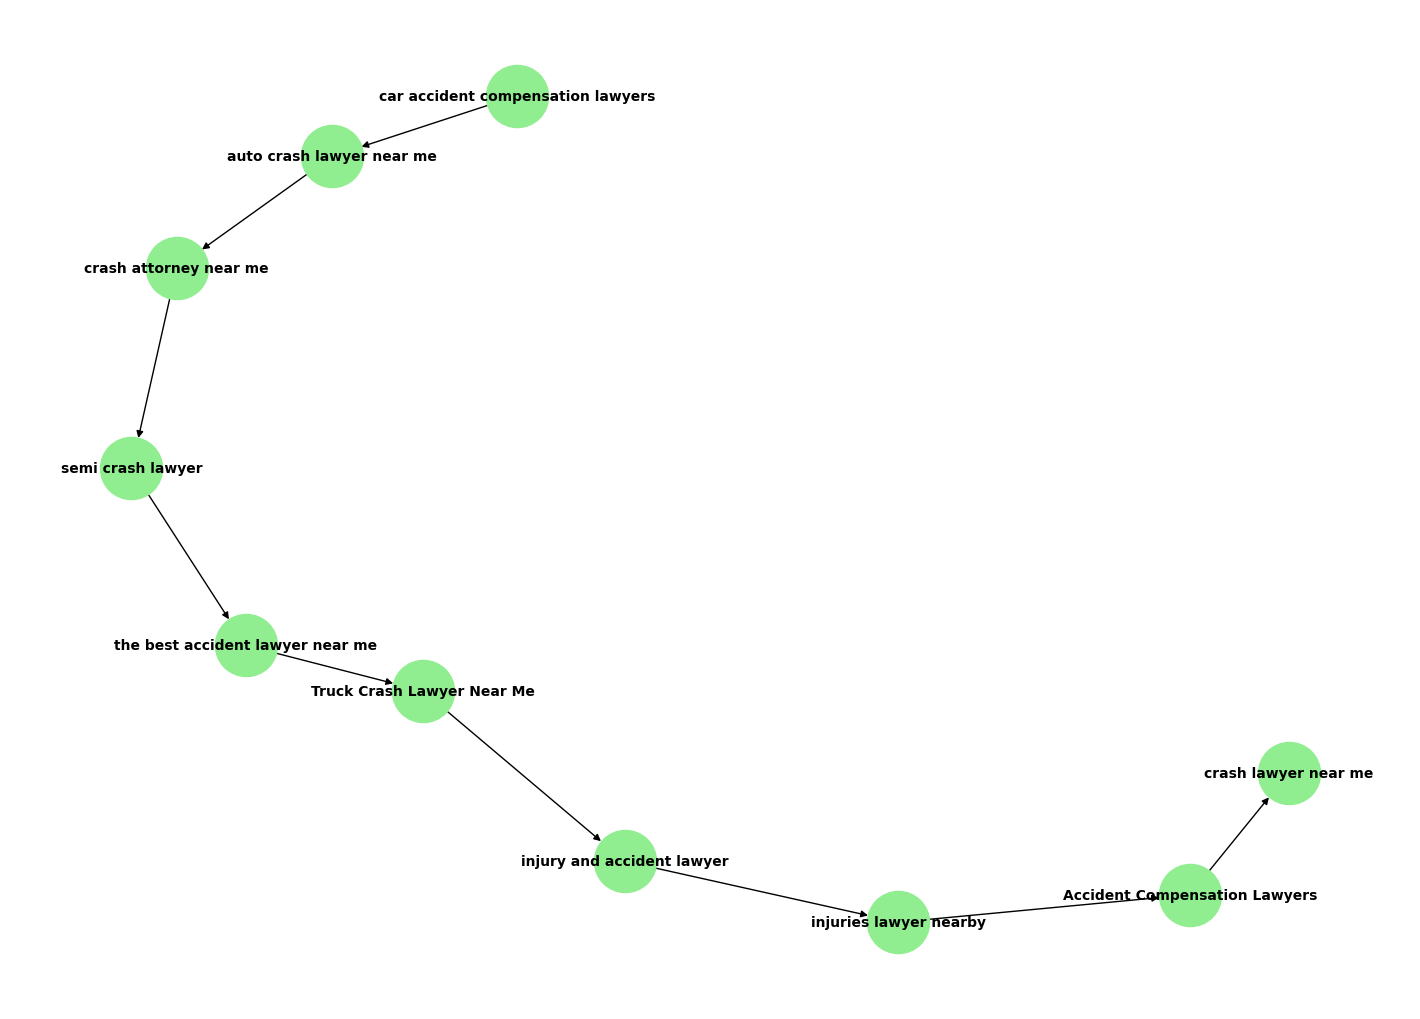

In [42]:
import matplotlib.pyplot as plt
import networkx as nx

# Perform Copeland Method ranking
rank_copeland = copeland_method(ranks.values, ['min'] * ranks.shape[1], graph=True, verbose=True)

# Create a DataFrame to associate keywords with their Copeland ranks
Copeland_results = pd.DataFrame({
    'Keyword': df['Keyword'],  # Assuming 'df' contains your original DataFrame with keywords
    'Copeland Rank': rank_copeland
})

# Sort the results by Copeland Rank
Copeland_results = Copeland_results.sort_values(by='Copeland Rank')


# Extract the sorted keywords
sorted_keywords = Copeland_results['Keyword'].tolist()

# Plot graph using sorted keywords instead of a1, a2, ...
plt.figure(figsize=(14, 10))  # Increase the size of the graph
G = nx.DiGraph()  # Directed graph
for i, keyword in enumerate(sorted_keywords):
    G.add_node(keyword)

# Add edges for visualization (example of a connected graph structure)
for i in range(len(sorted_keywords) - 1):
    G.add_edge(sorted_keywords[i], sorted_keywords[i+1])

# Draw graph
pos = nx.spring_layout(G)  # Spring layout for better visualization
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=2000, font_size=10, font_weight='bold')
plt.show()


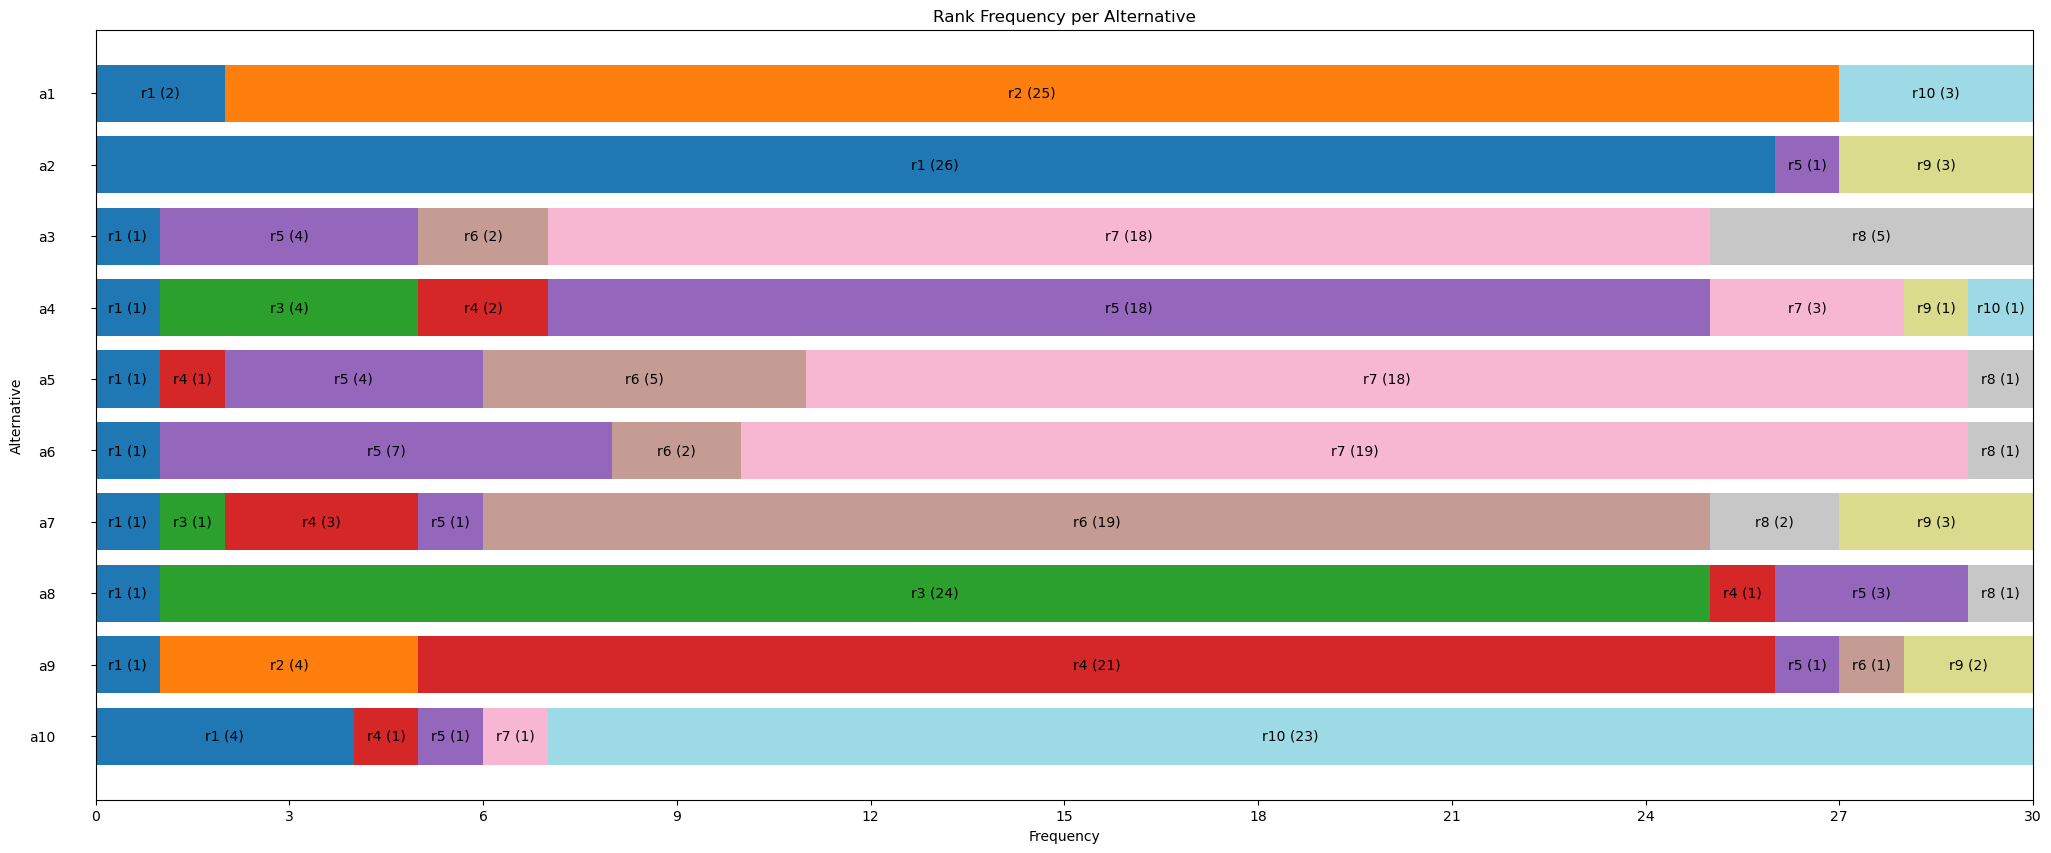

In [43]:
# Plot Ranks
plot_rank_freq(ranks, size_x = 25, size_y = 10)

In [48]:
# Assuming 'Borda Rank' is the correct column name instead of 'Rank'
borda_ranks = borda_results['Borda Rank'].tolist()  # Make sure 'Borda Rank' exists in your DataFrame

# If the ranks column isn't there, ensure ranks are computed and added like this:
# borda_results['Borda Rank'] = rank_borda  # If rank_borda is your computed rank

# Then, proceed to use this list in the rest of your logic


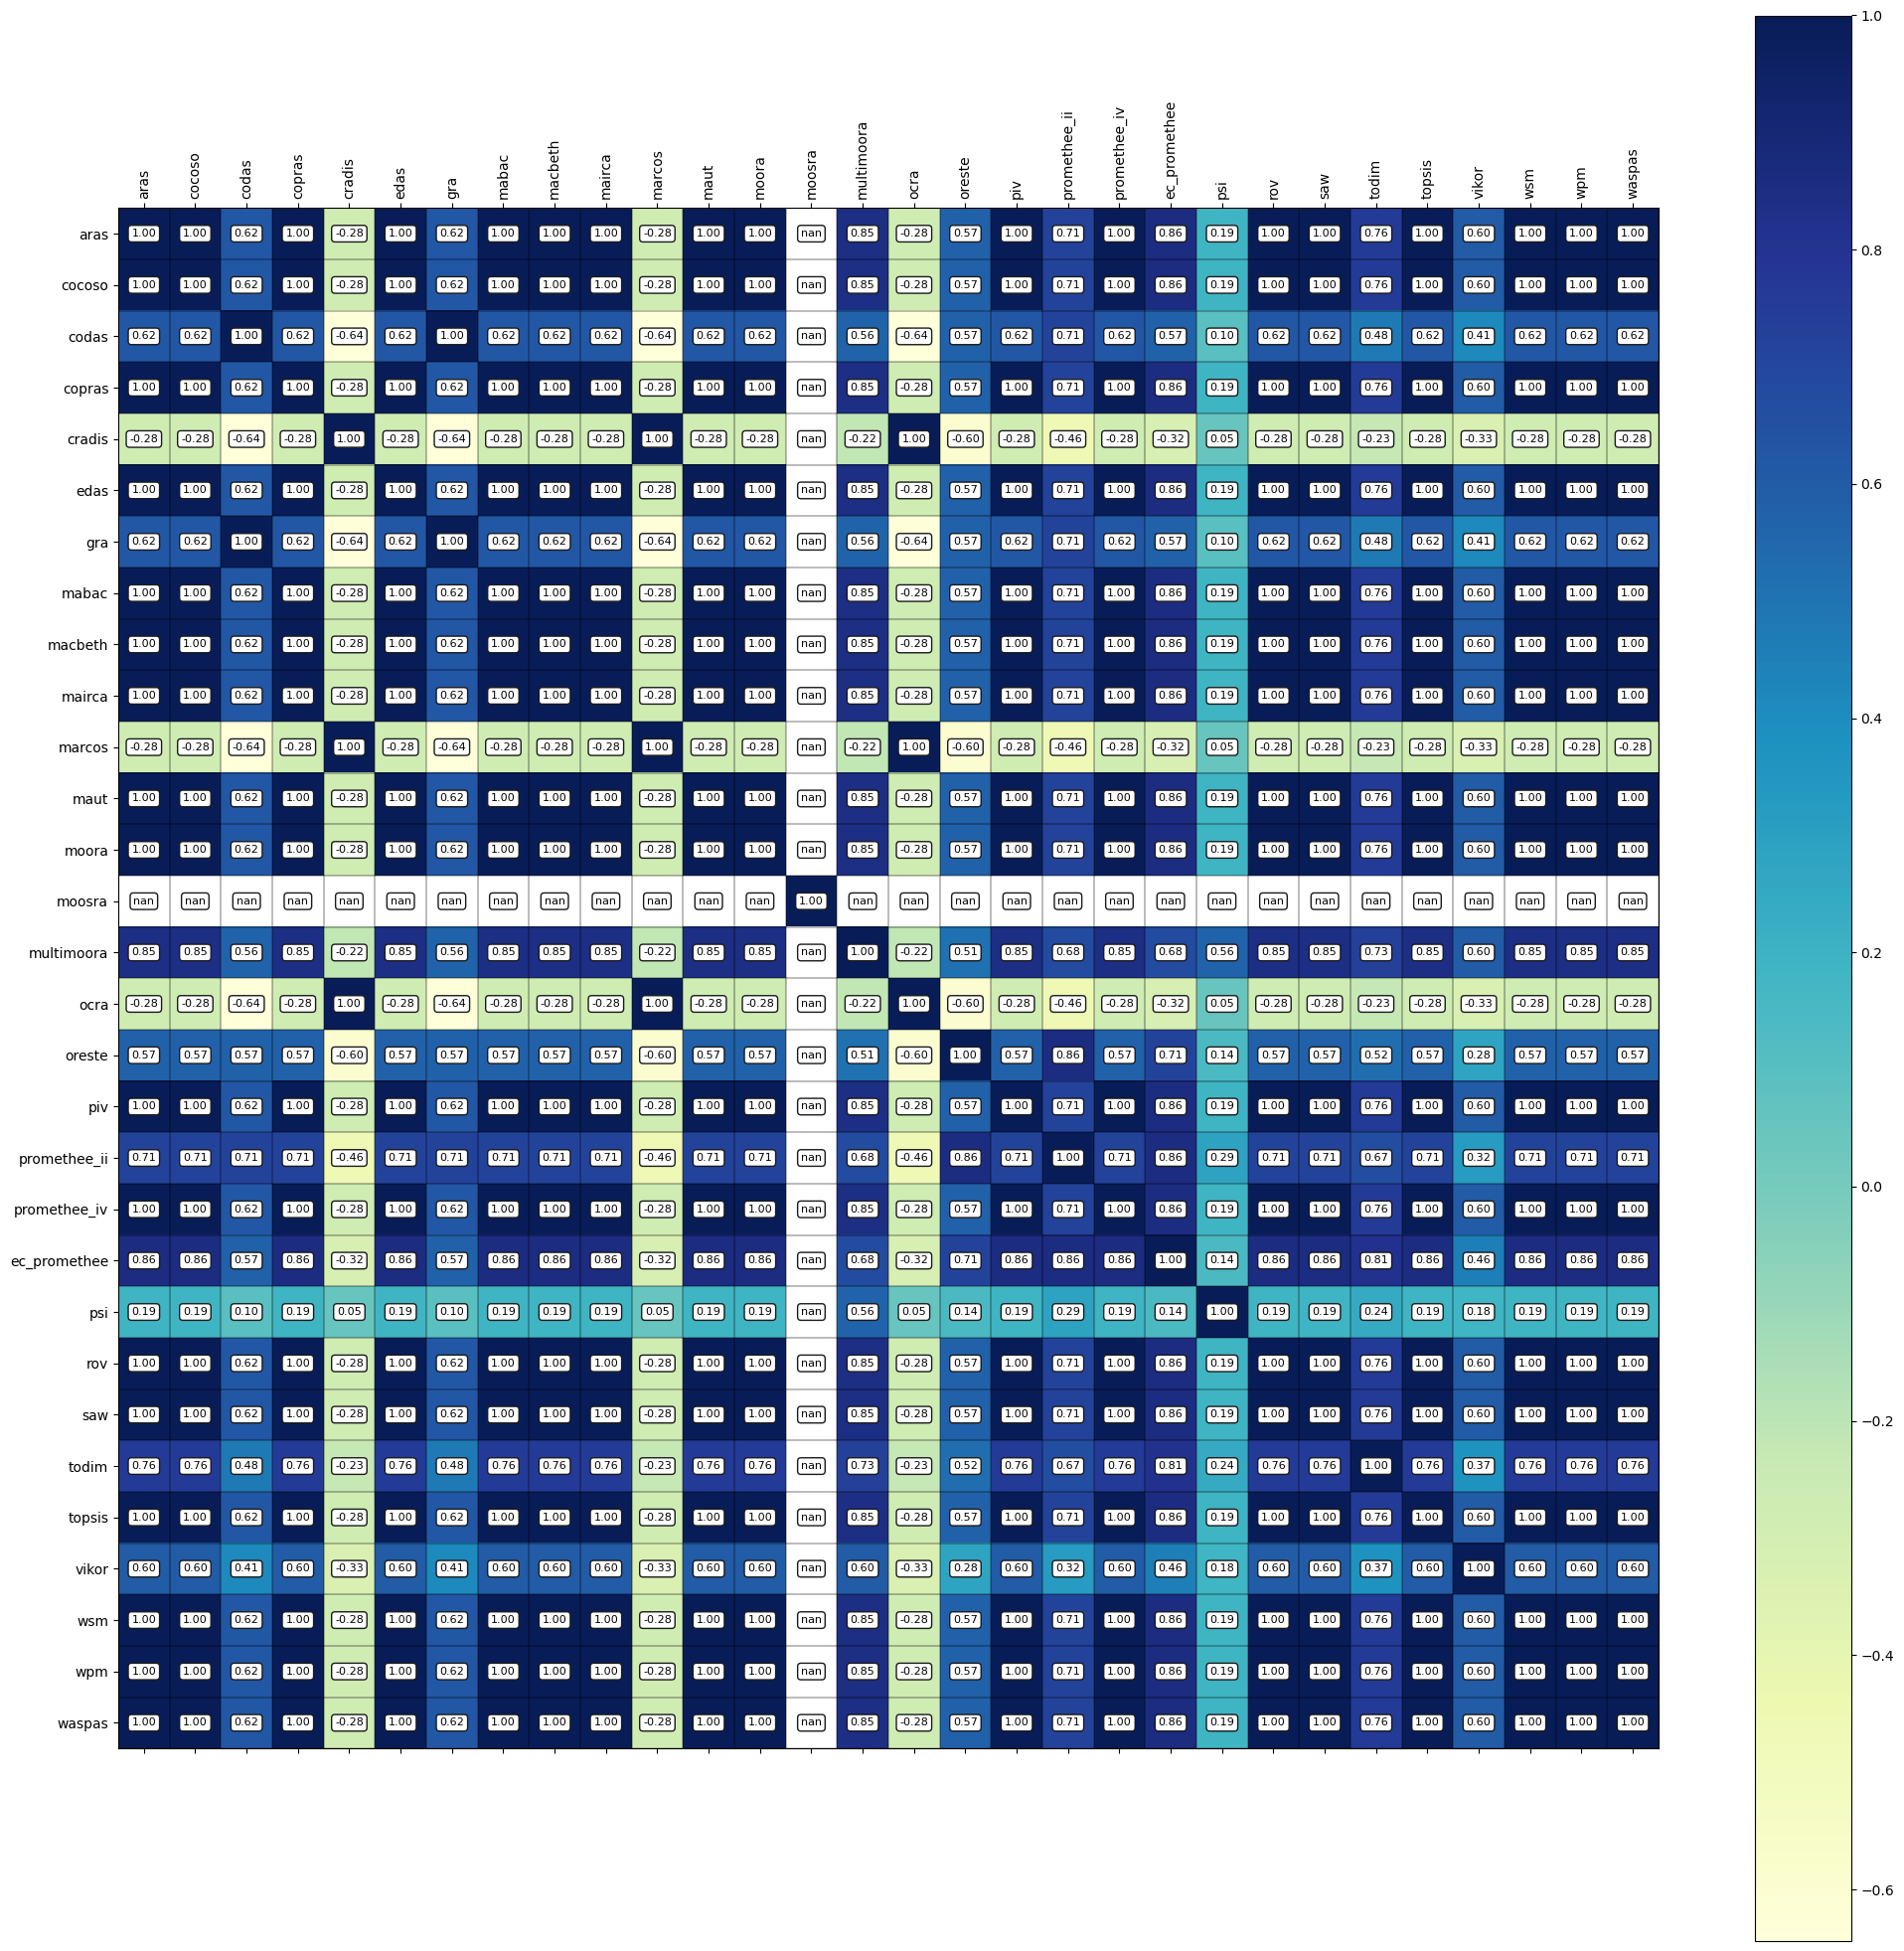

In [45]:
# Plot Correlations
method = 'kendall' # 'pearson', 'spearman',
corr   = corr_viz(ranks, correlation_method = method, size = 25, font_size = 8, graph = True)